# **Cyberbullying Detection and Classification**

### By: Mohammed AlQenae

##### Data Source: https://www.kaggle.com/code/sanjoymondal0/cyberbullying-classification/notebook

#### **Main Question**

Cyberbullying has been increasing significantly especially with easily accessible social media platforms. Its negatively affecting millions of people, especially teenagers. Social media platforms aren’t doing anything to reduce it or try to stop it. My question is that is there a way to detect posts of cyberbullying before they are posted? And are there common trends among the tweets that are posted? I will be analyzing a dataset of tweets that contains labels of what the cyberbullying type is such as gender, religion or ethnicity as well as  if the tweet doesn’t contain cyberbullying. 

The dataset I will be using is from Kaggle, it has 2 columns and 47692 rows. I will focus mostly on NLP to predict the label using a supervised machine learning method most probably Random Forest. I will also use a clustering method such as KMeans or Hierarchal Clustering to cluster the tweets into groups and find similarities. I will be delivering a Google Collab notebook as well as a written report. My expected findings is that the model will be able to predict the tweets that contain cyberbullying with high accuracy, but I think it will be more difficult to predict the exact label of the cyberbullying type. I also think that a lot of the cyberbullying tweets will be focused more on race than any of the other categories, so hopefully I will be able to find similarities and insights between the content of the tweets in that category.

#### **Importing packages**

In [1]:
import numpy as np
import pandas as pd

In [2]:
import spacy
from spacy import cli
from spacy import displacy

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from tensorflow import keras 
from tensorflow.keras import layers
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

#### **Importing the data**

In [4]:
data = pd.read_csv('cyberbullying_tweets.csv')

Getting to understand the dataset, looking at the null values we see that there ins't any null values.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


Looking at the first few rows of the dataset:

In [6]:
data.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


Looking at the unique values, we find that the unique values in the tweet text columns doesn't match the number of rows. That suggests that there are duplicates we need to drop.

In [7]:
data.nunique()

tweet_text            46017
cyberbullying_type        6
dtype: int64

Dropping Duplicates:

In [8]:
data=data.drop_duplicates(subset=['tweet_text'])

Making sure that there isn't anymore duplicates:

In [9]:
len(data)

46017

Looking at the different labels for tweets:

In [10]:
data['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

#### **Basic Visualizations**

Looking at the percentage of labels across the dataset, they seem to be equal across the entire dataset.

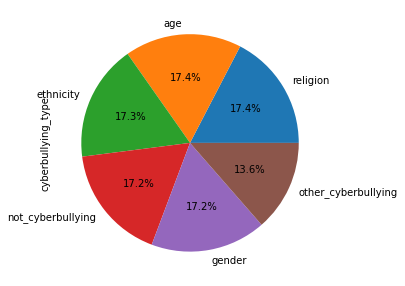

In [11]:
plt.figure(figsize=(5,5))
data_mil1=data['cyberbullying_type'].value_counts()
data_mil1.plot.pie(autopct="%.1f%%")

Plotting WordClouds for tweets for the entire dataset, to observe which words are most frequent. We notice that most of it contains bad and offensive words. This is normal since most of the dataset contains cyberbullying tweets.

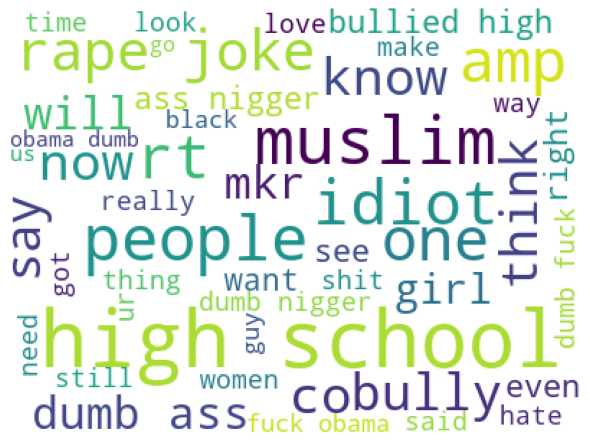

In [12]:
comment_words = ''
stopwords = set(STOPWORDS)
 
for val in data['tweet_text']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 400, height = 300,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Now we dig deeper and plot wordclouds for each label.We find that for the most part they look very similar, the same words keep occuring in most of the labels. We also notice that tweets that are labelled not cyberbullying has much less offensive words than other labels, but it still has some. This may suggest that although for the most part the tweets were correctly labelled, there might be a few that were mislabelled.

In [13]:
#Creating a list of the cyberbullying types to loop over them
cyberbullying_types=data['cyberbullying_type'].unique().tolist()

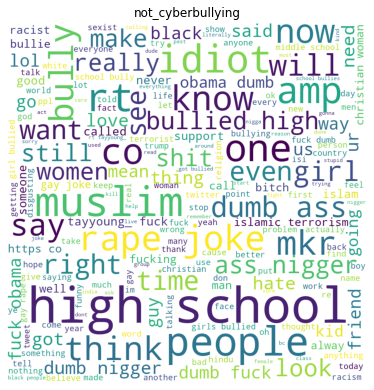

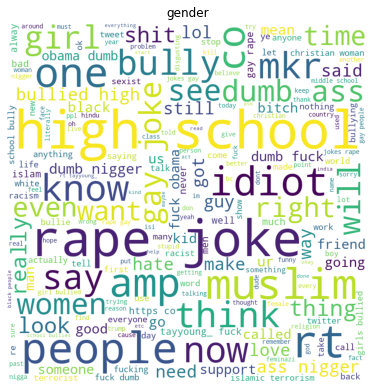

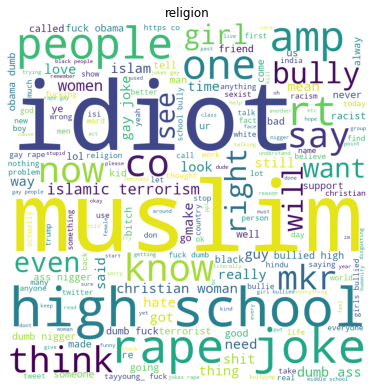

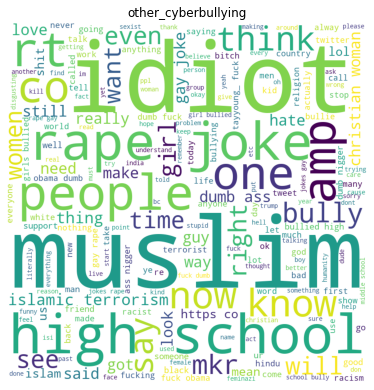

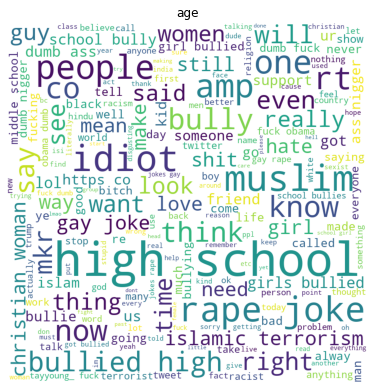

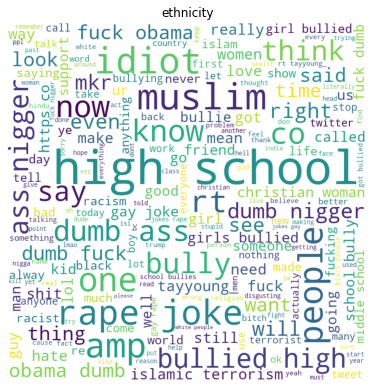

In [14]:
#Doing it for each label
for i in range(len(cyberbullying_types)):
  subset_data=data[data['cyberbullying_type']==cyberbullying_types[i]]

  for val in subset_data['tweet_text']:
      
      # typecaste each val to string
      val = str(val)
  
      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for r in range(len(tokens)):
          tokens[r] = tokens[r].lower()
      
      comment_words += " ".join(tokens)+" "
  
  wordcloud = WordCloud(width = 800, height = 800,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)

  plt.figure(figsize = (30, 30), facecolor = None)
  plt.subplot(1,6,i+1)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  plt.title(cyberbullying_types[i])


#### **Building models for NLP**

Now we are going to start building models for NLP, the first step is converting the cyberbullying type column to dummy variable columns.

In [15]:
data = pd.get_dummies(data, columns=['cyberbullying_type'])

In [16]:
data.head()

,tweet_text,cyberbullying_type_age,cyberbullying_type_ethnicity,cyberbullying_type_gender,cyberbullying_type_not_cyberbullying,cyberbullying_type_other_cyberbullying,cyberbullying_type_religion
0,"In other words #katandandre, your food was cra...",0,0,0,1,0,0
1,Why is #aussietv so white? #MKR #theblock #ImA...,0,0,0,1,0,0
2,@XochitlSuckkks a classy whore? Or more red ve...,0,0,0,1,0,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0,0,0,1,0,0
4,@RudhoeEnglish This is an ISIS account pretend...,0,0,0,1,0,0


Next we are going to shuffle the dataset and perform a 70%-30% train-test split.

In [17]:
data = shuffle(data)#Shuffling the dataset rows
train=data[:33384]#Doing a 70-30 train test split
test=data[33384:]

In [18]:
#Saving the tweets text column as a vairbale to loop over
text_column_train = train.iloc[:, 0] 

In [19]:
#Saving the dummy variables as a variable to feed into the model
labels_train=train.iloc[:, 1:7]

Downloading the spaCy model for NLP:

In [20]:
# use spacy cli
MODEL = "en_core_web_md"

# https://spacy.io/models/en
cli.download(MODEL)

# nlp = language model
nlp = spacy.load(MODEL)

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


Looping over the tweets and converting them into word embeddings

In [21]:
vectors_train=[]
for i in text_column_train:
    doc=nlp(i).vector #Converting the text to spacy embeddings
    vectors_train.append(doc)#Appending the embedings into a list
   

Converting the embeddings and labels as arrays to feed them into the model:

In [22]:
vectors_train=np.array(vectors_train)

In [23]:
labels_train=np.array(labels_train)

Building the model:I built a neural net model with 3 layers with relu activation functions, I found that to work the best. I also included dropout layers between the layers to prevent overfitting. For the output layer I chose a softmax activation since is a multi-label classification problem, softmax will provide an output of probabilities for each class that sums up to one. I also chose categorical crossentropy as my loss function because it tends to work the best for multi-class classification problems.

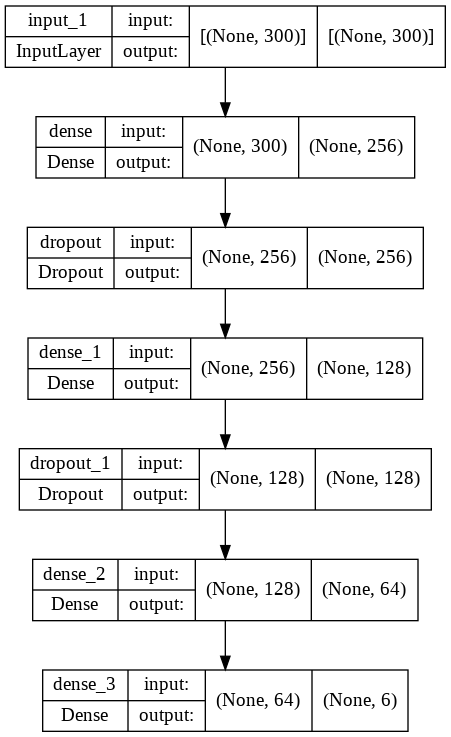

In [24]:
def build_model():

  inputs = keras.Input(shape=(300))
  x = layers.Dense(256,activation="relu")(inputs)
  x = layers.Dropout(0.5)(x)#Dropout layers to prevent overfitting
  x = layers.Dense(128,activation="relu")(x)
  x = layers.Dropout(0.5)(x)
  x = layers.Dense(64,activation="relu")(x)
  outputs = layers.Dense(6,activation="softmax")(x)#Softmax label for calcualting probabilties for different classes
  model= keras.Model(inputs, outputs)
  model.compile(loss="categorical_crossentropy",#Categrocial Crossentropy as a loss function since this is a multi-label classiification problem
                optimizer="adam",
                metrics=["accuracy"]
                )
  return model
keras.utils.plot_model(build_model(), show_shapes=True)

I fitted the model with 20 epochs since the loss starts to flatten at this point and the validation accuracy stops increasing. This suggests that the model stops learning and it's probably not worth it to have the epochs more than 20. I also did a validation split of 20%, that will help making sure that the model isn't overfitting on the training dataset.

In [25]:
#Compiling and fitting model
model = build_model()

model.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

history_1 = model.fit(vectors_train,labels_train,epochs=20,batch_size=30,validation_split=0.2)

Epoch 1/20
891/891 [==============================] - 8s 8ms/step - loss: 0.8248 - accuracy: 0.6904 - val_loss: 0.5720 - val_accuracy: 0.7734
Epoch 2/20
891/891 [==============================] - 7s 8ms/step - loss: 0.5949 - accuracy: 0.7758 - val_loss: 0.5151 - val_accuracy: 0.7983
Epoch 3/20
891/891 [==============================] - 7s 8ms/step - loss: 0.5569 - accuracy: 0.7916 - val_loss: 0.4885 - val_accuracy: 0.8086
Epoch 4/20
891/891 [==============================] - 8s 8ms/step - loss: 0.5220 - accuracy: 0.8006 - val_loss: 0.4686 - val_accuracy: 0.8180
Epoch 5/20
891/891 [==============================] - 7s 8ms/step - loss: 0.5023 - accuracy: 0.8082 - val_loss: 0.4541 - val_accuracy: 0.8224
Epoch 6/20
891/891 [==============================] - 4s 5ms/step - loss: 0.4857 - accuracy: 0.8144 - val_loss: 0.4561 - val_accuracy: 0.8219
Epoch 7/20
891/891 [==============================] - 4s 4ms/step - loss: 0.4668 - accuracy: 0.8190 - val_loss: 0.4421 - val_accuracy: 0.8239
Epoch 

This is plotting the validation loss, you can see that at around 20 epochs the loss starts to flatten.

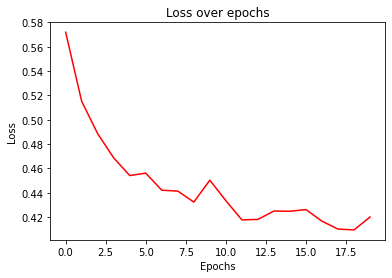

In [39]:
#Plotting loss
plt.plot(history_1.history['val_loss'],c='r')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss over epochs")
plt.show()

Preparing the data to test the model, repeating the same steps above.

In [27]:
#Preparing the data for testing the model
text_column_test = test.iloc[:, 0]
labels_test=test.iloc[:, 1:7]
vectors_test=[]
for i in text_column_test:
    doc=nlp(i).vector #Converting the text to spacy embeddings
    vectors_test.append(doc)#Appending the embedings into a list

In [28]:
column_names=[]
for col in labels_test:
  column_names.append(col)

In [29]:
vectors_test=np.array(vectors_test)
labels_test=np.array(labels_test)

The function below converts the model's output into a text label, this well help us test the model on accuracy.

In [30]:
def predictions_to_text(predictions):
  predictions = predictions.tolist()#Converting the input to a list
  text_predictions=[]

  for i in range(len(predictions)):
    max_value=max(predictions[i])#Taking the maximum probability of the outputs
    position=predictions[i].index(max_value)#Taking the position of that probability
    text=column_names[position]#Getting the text label that matches that position
    text_predictions.append(text)#Appending the text label to a list
  text_predictions=np.array(text_predictions)#Converting the list into an array
  return text_predictions

Performing predictions on the test dataset:

In [31]:
predictions=model.predict(vectors_test)

Converting those predictions into text labels:

In [32]:
text_test_predictions=predictions_to_text(predictions)

Converting the true labels from dummy variables into text labels. We can use the same function since it will take the maximum number, in this case 1 and extract the text label of that number.

In [33]:
text_test_labels=predictions_to_text(labels_test)

The model seems to be givving us an accuracy score of 83%, which is very good. That means that most of the time it is able to correctly classify the tweets.

In [34]:
accuracy_score(text_test_labels, text_test_predictions)

0.8271986068233991

#### **Clustering different labels**

In [35]:
text_column_clustering=data.iloc[:, 0]

In [36]:
vectors_train=[]
for i in text_column_clustering:
    doc=nlp(i).vector #Converting the text to spacy embeddings
    vectors_train.append(doc)#Appending the embedings into a list

Clustering the tweets using a KMeans of 6, since there are 6 labels.

In [37]:
km = KMeans(6)
k_labs= km.fit_predict(vectors_train)
k_labs= k_labs.tolist()
data['k6']=k_labs

Counting the cyberbullying types for each of the clusters, to find if they are doing a good job clustering for specific labels. We find that for most of them the clustering is perfomred well for most of the data points, for example cluster #1 it is clearly clustering based on the cyberbullying type ethnicity since it has around 3900 obsevrations of that type and the next highest type has around 400. On the other hand there are clusters where it is not clustered as well like #0 where the highest number of observations is in the cyberbullying type not cyberbullying column which had around 2900 observations. But it also had two other labels with around 2000 observations each, this seems not to be properly clustered since its widely dispersed across labels and not centered around one.

In [38]:
k6_profile = data.groupby("k6").sum()
k6_profile



,cyberbullying_type_age,cyberbullying_type_ethnicity,cyberbullying_type_gender,cyberbullying_type_not_cyberbullying,cyberbullying_type_other_cyberbullying,cyberbullying_type_religion
k6,,,,,,
0,370.0,702.0,2059.0,2868.0,2042.0,607.0
1,60.0,3890.0,414.0,206.0,351.0,26.0
2,6472.0,2154.0,2893.0,1986.0,2135.0,1054.0
3,0.0,0.0,4.0,493.0,4.0,0.0
4,12.0,80.0,327.0,1072.0,708.0,84.0
5,1078.0,1126.0,2201.0,1312.0,1003.0,6224.0


#### **Summary of Findings**

Overall, we find that there is definitley a way to detect cyberbullying tweets before they are posted. The nerual net model I built proves it, with an accuracy score of 83%. Although it is really good, it is still not good enoguh to be deployable. I think it has to reach an accuracy score of at least 90% to be deployable, otherwise there would be large number of tweets that don't contain cyberbullying and it might be classifying them as tweets that do. This in turn might leave a lot of people angry since their tweets are not getting posted. The model performed better than how I originally thought it would, I thought it would only be able to classify tweets as having cyberbullying or not but not to the extent of what cyberbullying type it is. That's clearly not the case, otherwise the accuracy score would be much less than 83%. Also, by clustering we find that the clustering does a really good job clustering on some of the labels but not so great on others. The KMeans clustering algorithim still does a good job finding similarities between some of the labels. However, I think that overall the neural net model does a better job classifying tweets than the KMeans algorithim.

#### **Limitations and future steps**

There are clear limitations to the dataset, the first one was that some of the tweets were clearly mislabelled. That can be observed from the wordclouds above, which were created for every label. This might have negatively affected the accuracy, since there was more noise and spillover generated between the labels that made it difficult for the model to capture the common trends and patterns between tweets. If we want to train a reliable deployable model, we must obtain another dataset where we can ensure that tweets are correctly labelled. I believe the best way to do that is by manually labelling tweets, this can be done by hiring people on online websites. The second limitation is the size and diversity of the tweets, the dataset might be sample that is only applicable to a subset of the population and not have external validity. Thus, the model and the results might not be generalizable to the public. In order for us to come up with a model that is generalizbale to the public we must ensure that we sample from data that is large and diverse and include tweets of people with different backgrouds and cultures. The future steps for deploying the model after training it on more diverse and correctly labelled data, is to find a way to install it as a plugin on twitter. This can be a plugin that parents can install on their kids phone, the plugin can hide tweets that the models labels as contains cyberbullying and also can stop the kid from tweeting if it flags the written tweet as contains cyberbullying. This would help children both from both sending and receiving tweets that contains cyberbullying. The model needs to constanlty be updated and trained on new tweets, especially that teenagers language and slang is constantly changing. And also, once they find that the plugin is stopping them from writing some tweets they might test it out to what are the  things they can write that the plugin won't be able to detect. They might switch into sending emoji's instead in an offensive manner. The model must be trained to account for all the upcoming possiilities and changes in their behavior and be able to detect it.

In [40]:
#Installing nbcovert to convert notebook to an html
!pip install nbconvert

In [ ]:
#Downloading the notebook as an html to convert into a pdf
!jupyter nbconvert --to html BA890-Mohammed AlQenae.ipynb